Recording...
Done recording.


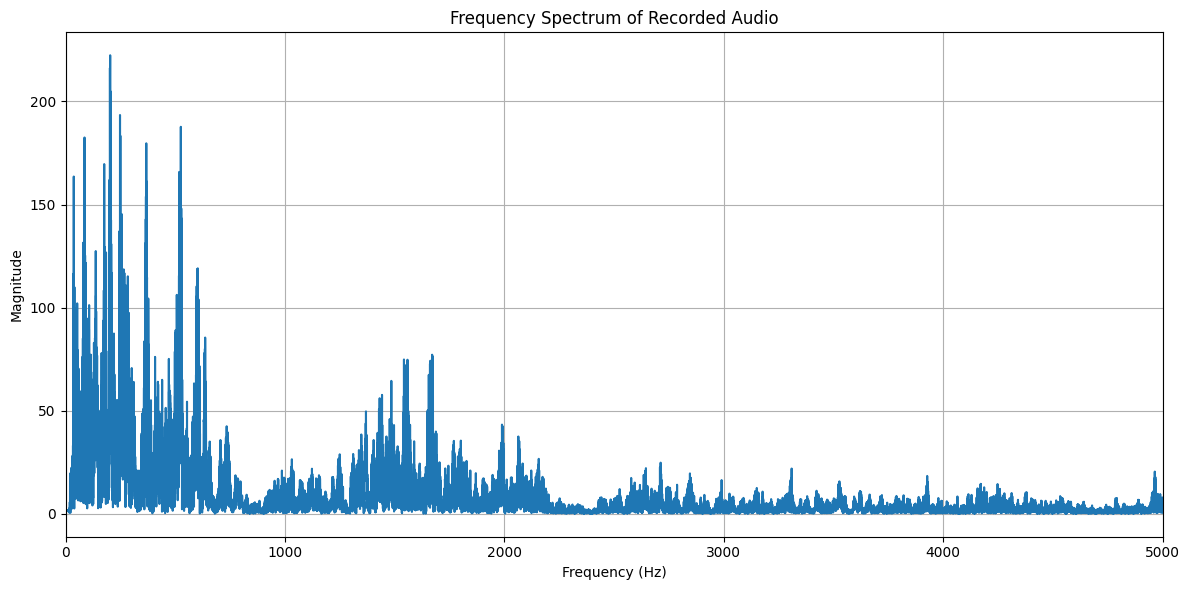

In [2]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# ─── Step 1: Record audio ────────────────────────────────────────
duration = 5  # seconds
fs = 44100    # sample rate (Hz)

print("Recording...")
recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait()
print("Done recording.")

# Save the recording
recording = recording.flatten()  # make 1D
wav.write("output.wav", fs, recording.astype(np.float32))

# ─── Step 2: Compute and plot FFT ────────────────────────────────
# Perform Fast Fourier Transform
fft_spectrum = np.fft.rfft(recording)
frequencies = np.fft.rfftfreq(len(recording), d=1/fs)
magnitude = np.abs(fft_spectrum)

# Plot frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitude)
plt.title("Frequency Spectrum of Recorded Audio")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim(0, 5000)  # Show only up to 5 kHz
plt.tight_layout()
plt.show()